In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import random
import scipy
import seaborn

## Generación de una población con distribución Poisson

Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [2]:
population_mu = 10
population = scipy.stats.poisson.rvs(mu=population_mu, size=10000)
print(population.shape)
population[:40]

(10000,)


array([11, 10,  6, 11,  7,  2, 14, 14, 16, 17,  5,  8, 23, 10, 11,  7,  6,
       11,  7,  8,  8, 12, 15,  8, 10, 14,  7, 11,  9, 10, 17,  6,  8, 10,
       10, 12,  7, 10, 16,  7])

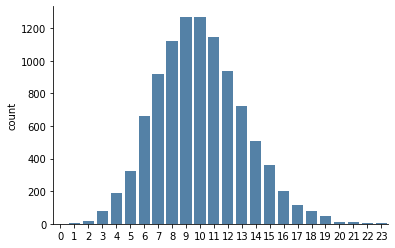

In [3]:
seaborn.countplot(population, color='steelblue')
seaborn.despine()

### Sampleo aleatorio con y sin reposición

https://pynative.com/python-random-sample/

In [4]:
sample_size = 500

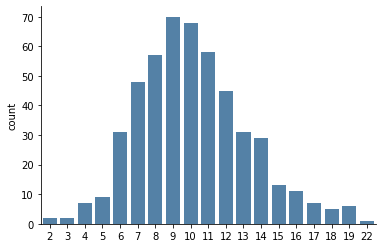

In [5]:
new_sample = random.sample(population.tolist(), sample_size)  # Sin reemplazo
seaborn.countplot(new_sample, color='steelblue')
seaborn.despine()

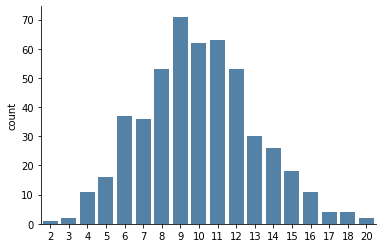

In [6]:
new_sample = random.choices(population.tolist(), k=sample_size)  # Con reemplazo
seaborn.countplot(new_sample, color='steelblue')
seaborn.despine()

### La verdad del Teorema Central del Límite

Por el teorema central del límite, esperamos que el conjunto de medias tenga una distribución aproximadamente normal con la misma media poblacional y $\sigma = s/\sqrt{n}$, donde n es la cantidad de muestras.

1000 500


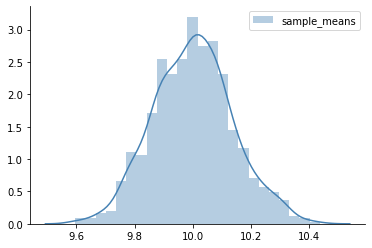

In [7]:
n_samples = 1000
print(n_samples, sample_size)
sample_means = []
for _ in range(n_samples):
    new_sample = random.sample(population.tolist(), k=sample_size)  # Sin reemplazo
    sample_means.append(numpy.mean(new_sample))  # media muestral
    
# Calculate expected normal distribution
seaborn.distplot(sample_means, label="sample_means", color="steelblue")
plt.legend()
seaborn.despine()

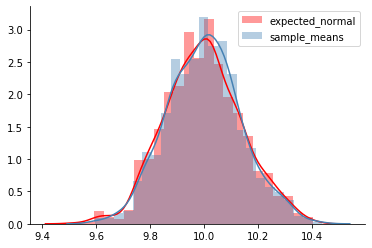

In [8]:
# Calculate expected normal distribution
mean_distribution_sigma = numpy.sqrt(population_mu) / numpy.sqrt(sample_size)
expected_normal = numpy.random.normal(population_mu, mean_distribution_sigma, 1000)
seaborn.distplot(expected_normal, label="expected_normal", color="red")
seaborn.distplot(sample_means, label="sample_means", color="steelblue")
plt.legend()
seaborn.despine()

### Intervalos de confianza (del promedio como estimador de la distribución de medias poblacionales)

In [11]:
scipy.stats.norm.interval(0.95, loc=population_mu,
                          scale=mean_distribution_sigma)

(9.722819235130064, 10.277180764869936)